# Introduction

Looking at data here

In [54]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1 #set the value globally
%matplotlib inline

data = pd.read_csv('data/edges-spokeless.csv')
data

,Source,Target,Type,Weight
0,visitorfi5kl7q7i,zpffh4wwhuu3ndxm,Directed,1
1,visitorfi5kl7q7i,toristfgqiroaded,Directed,1
2,visitorfi5kl7q7i,x3nelbld33llasqv,Directed,1
3,visitorfi5kl7q7i,bzreqoyjwop3dbtn,Directed,1
4,visitorfi5kl7q7i,deaddropinli5cme,Directed,1
...,...,...,...,...
20327,mihl4p6zv57y2e53,3g2upl4pq6kufc4m,Directed,1
20328,jjrbfzv3f2vff7fb,fhostingesps6bly,Directed,2
20329,fbr3urtao5c4zecb,fhostingesps6bly,Directed,1
20330,grams7hm4x3gb7wj,toradsc6vvmtugty,Directed,1


In [27]:
import networkx as nx

temp = []
for index, row in data.iterrows():
    a,b,weight = row['Source'], row['Target'], row['Weight']
    temp.append((a,b,weight))
    
G = nx.DiGraph()
G.add_weighted_edges_from(temp)

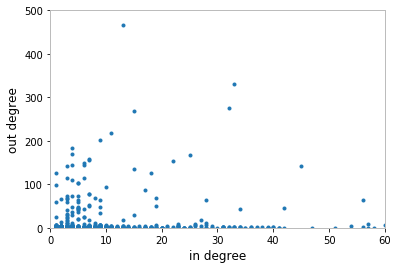

In [55]:
kins, kouts = [], []
for node in G.nodes():
    kin = G.in_degree(node)
    kout = G.out_degree(node)
    kins.append(kin)
    kouts.append(kout)
plt.plot(kins,kouts,'.')
plt.xlabel('in degree',fontsize=12)
plt.ylabel('out degree',fontsize=12)
plt.xlim([0,60])
plt.ylim([0,500])
plt.savefig('scatter-plot-kin-kout.pdf')

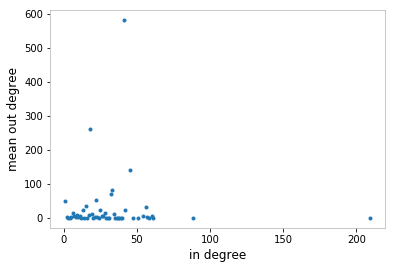

In [51]:
#show average
d = {}
for kin,kout in zip(kins,kouts):
    if kin not in d:
        d[kin] = (kout,1)
    else:
        t1,t2 = d[kin]
        d[kin] = (t1+kout, t2+1)
        
d1 = {key:1.*(val)[0]/val[1] for key,val in d.items()}
plt.plot(d1.keys(),d1.values(),'.')
plt.xlabel('in degree',fontsize=12)
plt.ylabel('mean out degree',fontsize=12)
plt.savefig('scatter-plot-kin-mean-kout.pdf')

Text(0, 0.5, 'out degree')

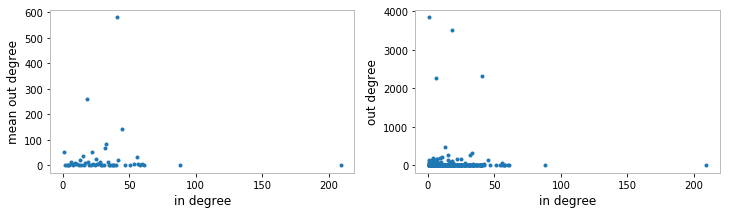

In [58]:
plt.figure(figsize=(12,3), linewidth=100)
plt.subplot(121)

#show average
d = {}
for kin,kout in zip(kins,kouts):
    if kin not in d:
        d[kin] = (kout,1)
    else:
        t1,t2 = d[kin]
        d[kin] = (t1+kout, t2+1)
        
d1 = {key:1.*(val)[0]/val[1] for key,val in d.items()}
plt.plot(d1.keys(),d1.values(),'.')
plt.xlabel('in degree',fontsize=12)
plt.ylabel('mean out degree',fontsize=12)

plt.subplot(122)
plt.plot(kins,kouts,'.')
plt.xlabel('in degree',fontsize=12)
plt.ylabel('out degree',fontsize=12)
#plt.savefig('scatter-plot-kin-kout.pdf')